<a href="https://colab.research.google.com/github/bhitsho/Password_Strength_Analyser/blob/main/xaibarclays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import time
import math
from difflib import SequenceMatcher

# Brute-force password cracking simulation
def brute_force(target_password, max_length=None):
    """
    Simulate brute-force cracking by iterating through combinations.
    For demonstration, the search stops at max_length (defaults to len(target_password)).
    Returns the cracked password, number of attempts, and elapsed time.
    """
    chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    if max_length is None:
        max_length = len(target_password)
    length = 1
    attempts = 0
    start_time = time.time()

    while length <= max_length:
        for attempt in itertools.product(chars, repeat=length):
            guess = ''.join(attempt)
            attempts += 1
            # For demonstration, we print only every 10000th attempt to avoid flooding the output
            if attempts % 10000 == 0:
                print(f"Brute-force attempt {attempts}: {guess}")
            if guess == target_password:
                elapsed = time.time() - start_time
                return guess, attempts, elapsed
        length += 1
    return None, attempts, time.time() - start_time

# Simulated Hashcat analysis based on entropy calculation
def hashcat_simulation(target_password):
    """
    Estimates the cracking time using an entropy-based model.
    Calculates the number of possible combinations and simulates a cracking time
    given a hypothetical guess rate.
    """
    # Define the character pool based on the password's composition
    pool = 0
    if any(c.islower() for c in target_password):
        pool += 26
    if any(c.isupper() for c in target_password):
        pool += 26
    if any(c.isdigit() for c in target_password):
        pool += 10
    if any(not c.isalnum() for c in target_password):
        pool += 32  # common symbols estimate

    if pool == 0:
        pool = 1  # avoid division by zero

    # Estimate entropy (bits)
    entropy = len(target_password) * math.log2(pool)

    # Calculate total possibilities and simulated time (using a hypothetical guess rate)
    possibilities = 2 ** entropy
    hashcat_rate = 1e11  # e.g., 100 billion guesses per second
    time_estimate = possibilities / hashcat_rate
    return entropy, possibilities, time_estimate

# XAI explanation based on the results from brute-force and hashcat simulation
def generate_xai_explanation(target_password, brute_info, hashcat_info):
    """
    Combines the brute-force results and simulated hashcat analysis to explain password strength.
    Also uses a similarity metric against a common password pattern.
    """
    guessed, attempts, brute_time = brute_info
    entropy, possibilities, hashcat_time = hashcat_info

    explanation = f"Password: {target_password}\n"
    explanation += f"Brute-force simulation: {attempts} attempts in {brute_time:.4f} seconds.\n"
    explanation += f"Estimated entropy: {entropy:.2f} bits\n"
    explanation += f"Total possibilities: {possibilities:.2e}\n"
    explanation += f"Simulated Hashcat cracking time: {hashcat_time:.4f} seconds.\n\n"

    # Explain vulnerability based on simulated cracking times
    if hashcat_time < 1:
        explanation += "Analysis: The password can be cracked almost instantly with advanced tools. It is highly vulnerable.\n"
    elif hashcat_time < 60:
        explanation += "Analysis: The password is weak and could be compromised within a minute by dedicated attackers.\n"
    else:
        explanation += "Analysis: The password has higher complexity, making it more resistant to brute-force attacks.\n"

    # Similarity check with a common password (e.g., 'password')
    common_password = "password"
    similarity = SequenceMatcher(None, target_password, common_password).ratio()
    if similarity > 0.5:
        explanation += "Warning: Your password bears similarity to common password patterns, which increases vulnerability.\n"
    else:
        explanation += "Your password does not closely resemble common patterns.\n"

    return explanation

# Main function: Get user input and run the analysis
def main():
    target = input("Enter the password for analysis: ").strip()

    print("\nStarting brute-force simulation...")
    brute_info = brute_force(target, max_length=len(target))
    if brute_info[0]:
        print(f"\nBrute-force cracked password: {brute_info[0]}")
        print(f"Attempts: {brute_info[1]}, Time: {brute_info[2]:.4f} seconds")
    else:
        print("\nBrute-force simulation did not crack the password within the max length limit.")

    hashcat_info = hashcat_simulation(target)
    entropy, possibilities, hashcat_time = hashcat_info
    print(f"\nSimulated Hashcat cracking time: {hashcat_time:.4f} seconds (Entropy: {entropy:.2f} bits)")

    explanation = generate_xai_explanation(target, brute_info, hashcat_info)
    print("\nXAI Explanation:\n")
    print(explanation)

if __name__ == "__main__":
    main()


Enter the password for analysis: abcd

Starting brute-force simulation...
Brute-force attempt 10000: bKr
Brute-force attempt 20000: elJ
Brute-force attempt 30000: gW1
Brute-force attempt 40000: jyj
Brute-force attempt 50000: l9B
Brute-force attempt 60000: oKT
Brute-force attempt 70000: rmb
Brute-force attempt 80000: tXt
Brute-force attempt 90000: wyL
Brute-force attempt 100000: y93
Brute-force attempt 110000: BLl
Brute-force attempt 120000: EmD
Brute-force attempt 130000: GXV
Brute-force attempt 140000: Jzd
Brute-force attempt 150000: Mav
Brute-force attempt 160000: OLN
Brute-force attempt 170000: Rm5
Brute-force attempt 180000: TYn
Brute-force attempt 190000: WzF
Brute-force attempt 200000: ZaX
Brute-force attempt 210000: 1Mf
Brute-force attempt 220000: 4nx
Brute-force attempt 230000: 6YP
Brute-force attempt 240000: 9z7

Brute-force cracked password: abcd
Attempts: 246206, Time: 0.0453 seconds

Simulated Hashcat cracking time: 0.0000 seconds (Entropy: 18.80 bits)

XAI Explanation:

Pa

Downloaded rockyou.txt.tar.gz successfully.
Extracted rockyou.txt successfully.
Descriptive Statistics for Password Lengths:
count    1.434468e+07
mean     8.753655e+00
std      2.914923e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      2.850000e+02
Name: length, dtype: float64


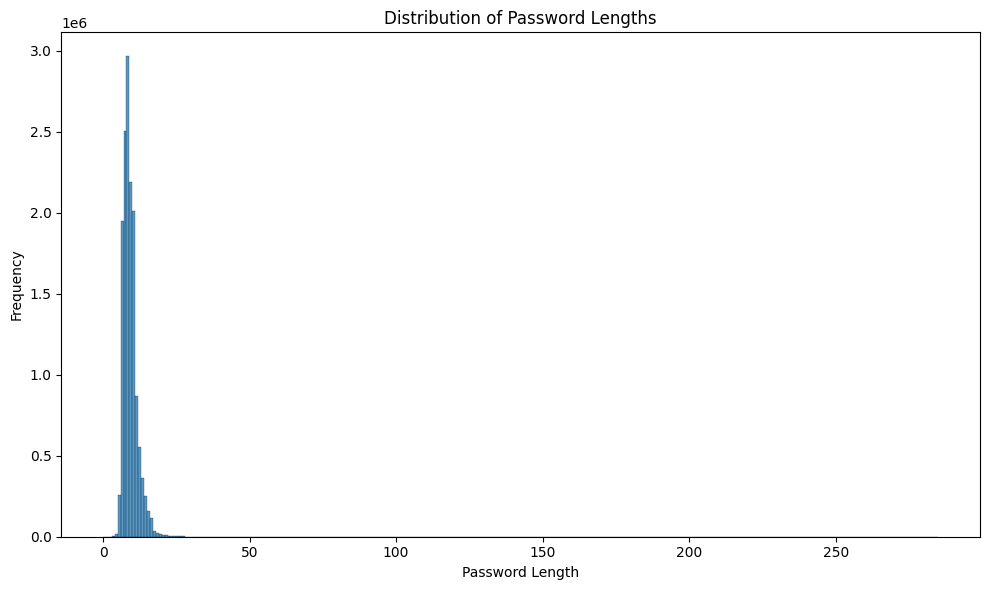


Top 10 Most Common Passwords:
password
*7Â¡Vamos!    1
123456           1
12345            1
123456789        1
password         1
iloveyou         1
princess         1
1234567          1
rockyou          1
12345678         1
Name: count, dtype: int64


<ipython-input-15-5f10980f603b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_passwords.values, y=top_passwords.index, palette='viridis')
<ipython-input-15-5f10980f603b>:76: UserWarning: Glyph 4 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-5f10980f603b>:76: UserWarning: Glyph 3 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


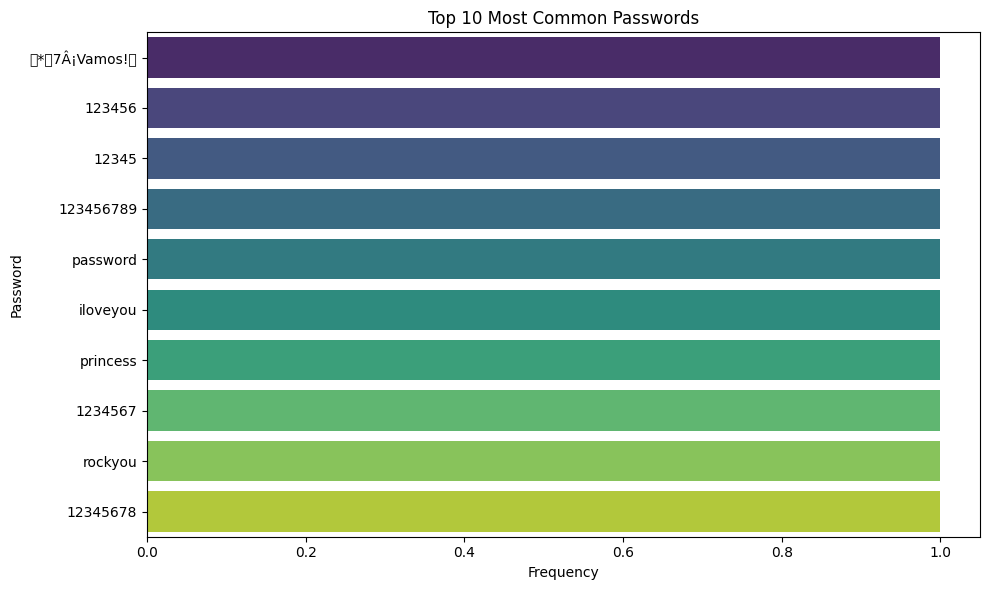

In [ ]:
import requests
import tarfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the RockYou dataset as a tar.gz archive
url = "https://github.com/danielmiessler/SecLists/raw/master/Passwords/Leaked-Databases/rockyou.txt.tar.gz"
response = requests.get(url)

if response.status_code == 200:
    archive_name = "rockyou.txt.tar.gz"
    with open(archive_name, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {archive_name} successfully.")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")
    exit(1)

# Step 2: Extract the archive to obtain rockyou.txt
if os.path.exists(archive_name):
    try:
        with tarfile.open(archive_name, "r:gz") as tar:
            tar.extractall()
        print("Extracted rockyou.txt successfully.")
    except Exception as e:
        print("Error extracting the archive:", e)
        exit(1)
else:
    print("Archive file not found.")
    exit(1)

# Step 3: Load and preprocess the dataset
# The extracted file "rockyou.txt" contains one password per line.
try:
    with open("rockyou.txt", "r", encoding="latin-1") as f:
        passwords = f.read().splitlines()
except Exception as e:
    print("Error reading rockyou.txt:", e)
    exit(1)

# Create a DataFrame from the passwords list
df = pd.DataFrame(passwords, columns=['password'])

# Clean the data: remove any empty values and duplicates
df = df[df['password'].str.strip() != ""]
df.drop_duplicates(inplace=True)

# Add a new column for password length
df['length'] = df['password'].apply(len)

# Display basic descriptive statistics for password lengths
print("Descriptive Statistics for Password Lengths:")
print(df['length'].describe())

# Step 4: Visualize the Distribution of Password Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=range(0, df['length'].max() + 1, 1), kde=False)
plt.title('Distribution of Password Lengths')
plt.xlabel('Password Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 5: Identify and Visualize the Top 10 Most Common Passwords
top_passwords = df['password'].value_counts().head(10)
print("\nTop 10 Most Common Passwords:")
print(top_passwords)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_passwords.values, y=top_passwords.index, palette='viridis')
plt.title('Top 10 Most Common Passwords')
plt.xlabel('Frequency')
plt.ylabel('Password')
plt.tight_layout()
plt.show()


Downloaded rockyou.txt.tar.gz successfully.
Extracted rockyou.txt successfully.
Descriptive Statistics for Password Lengths:
count    1.434468e+07
mean     8.753655e+00
std      2.914923e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      2.850000e+02
Name: length, dtype: float64

Descriptive Statistics for Password Entropy:
count    1.434468e+07
mean     2.679250e+00
std      4.170168e-01
min      0.000000e+00
25%      2.481715e+00
50%      2.725481e+00
75%      2.947703e+00
max      5.632306e+00
Name: entropy, dtype: float64


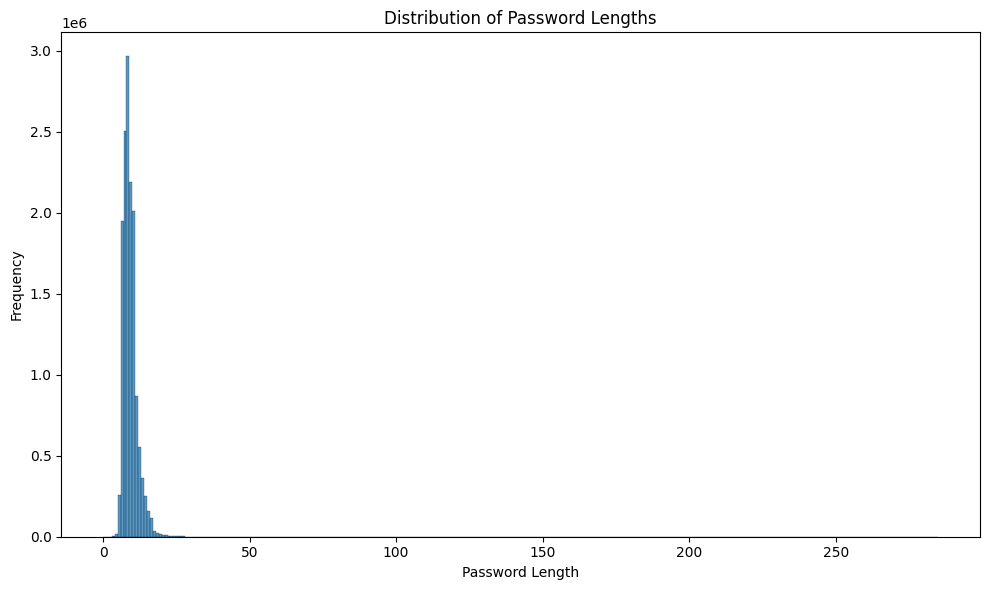

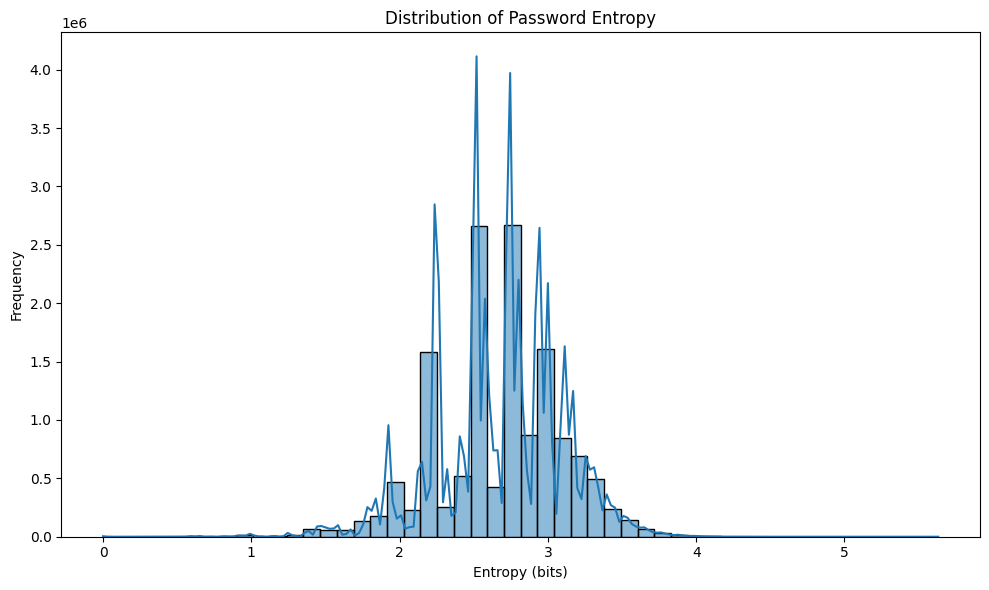

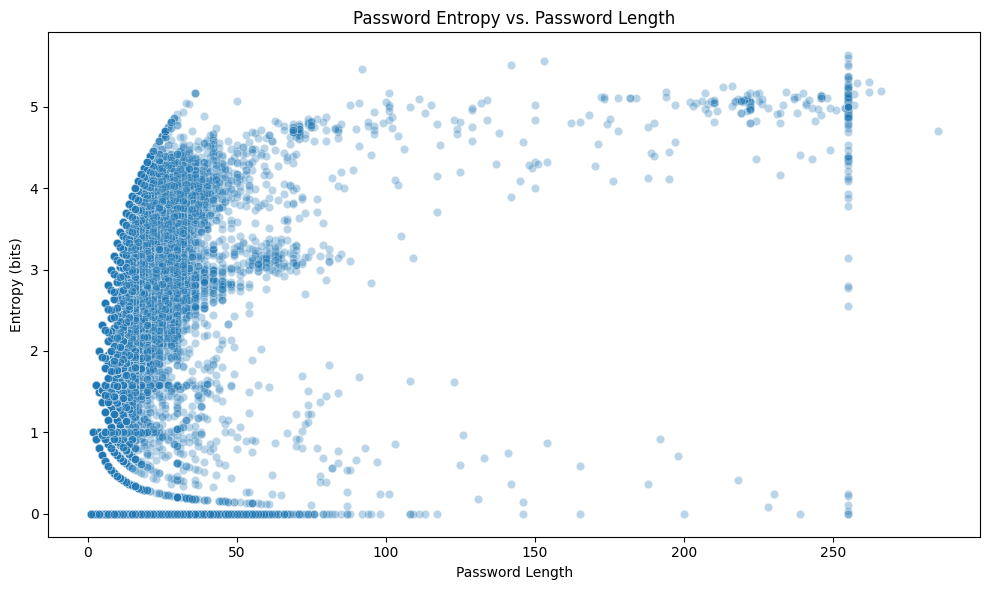


Top 10 Most Common Passwords:
password
*7Â¡Vamos!    1
123456           1
12345            1
123456789        1
password         1
iloveyou         1
princess         1
1234567          1
rockyou          1
12345678         1
Name: count, dtype: int64


<ipython-input-16-4327f48f3acc>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_passwords.values, y=top_passwords.index, palette='viridis')
<ipython-input-16-4327f48f3acc>:116: UserWarning: Glyph 4 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-4327f48f3acc>:116: UserWarning: Glyph 3 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


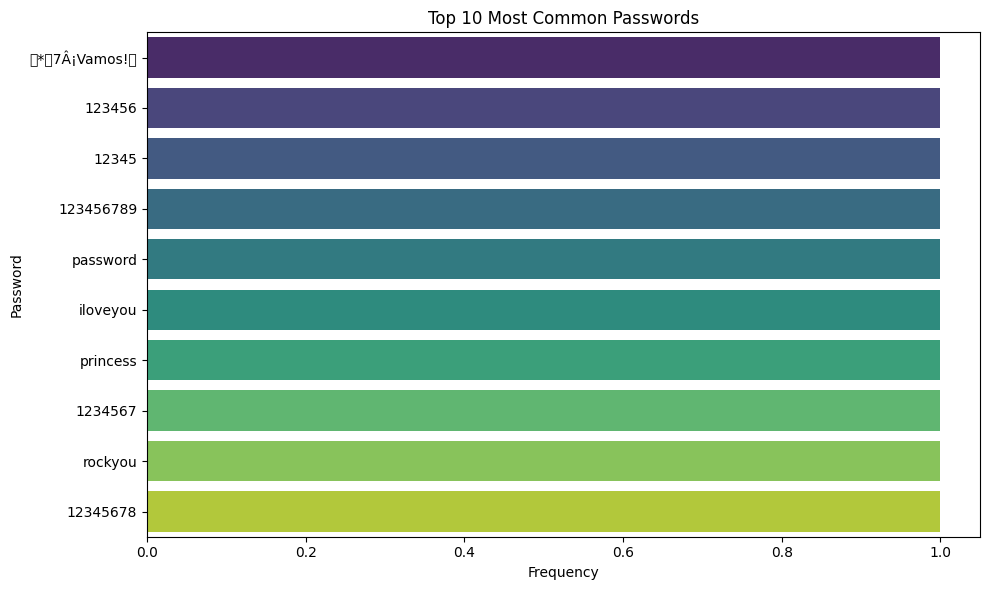

In [ ]:
import requests
import tarfile
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute Shannon entropy of a string (password)
def compute_entropy(password):
    if not password:
        return 0
    # Calculate frequency of each character
    freq = {}
    for char in password:
        freq[char] = freq.get(char, 0) + 1
    # Compute entropy
    entropy = 0
    length = len(password)
    for count in freq.values():
        p = count / length
        entropy -= p * math.log2(p)
    return entropy

# Step 1: Download the RockYou dataset as a tar.gz archive
url = "https://github.com/danielmiessler/SecLists/raw/master/Passwords/Leaked-Databases/rockyou.txt.tar.gz"
response = requests.get(url)

if response.status_code == 200:
    archive_name = "rockyou.txt.tar.gz"
    with open(archive_name, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {archive_name} successfully.")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")
    exit(1)

# Step 2: Extract the archive to obtain rockyou.txt
if os.path.exists(archive_name):
    try:
        with tarfile.open(archive_name, "r:gz") as tar:
            tar.extractall()
        print("Extracted rockyou.txt successfully.")
    except Exception as e:
        print("Error extracting the archive:", e)
        exit(1)
else:
    print("Archive file not found.")
    exit(1)

# Step 3: Load and preprocess the dataset
# The extracted file "rockyou.txt" contains one password per line.
try:
    with open("rockyou.txt", "r", encoding="latin-1") as f:
        passwords = f.read().splitlines()
except Exception as e:
    print("Error reading rockyou.txt:", e)
    exit(1)

# Create a DataFrame from the passwords list
df = pd.DataFrame(passwords, columns=['password'])

# Clean the data: remove any empty values and duplicates
df = df[df['password'].str.strip() != ""]
df.drop_duplicates(inplace=True)

# Create a new column for password length
df['length'] = df['password'].apply(len)

# Step 4: Calculate the entropy for each password
df['entropy'] = df['password'].apply(compute_entropy)

# Display basic descriptive statistics for password lengths and entropy
print("Descriptive Statistics for Password Lengths:")
print(df['length'].describe())
print("\nDescriptive Statistics for Password Entropy:")
print(df['entropy'].describe())

# Step 5: Visualize the Distribution of Password Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=range(0, df['length'].max() + 1, 1), kde=False)
plt.title('Distribution of Password Lengths')
plt.xlabel('Password Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 6: Visualize the Distribution of Password Entropy
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], bins=50, kde=True)
plt.title('Distribution of Password Entropy')
plt.xlabel('Entropy (bits)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 7: Scatter Plot of Entropy vs. Password Length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='length', y='entropy', alpha=0.3)
plt.title('Password Entropy vs. Password Length')
plt.xlabel('Password Length')
plt.ylabel('Entropy (bits)')
plt.tight_layout()
plt.show()

# Step 8: Identify and Visualize the Top 10 Most Common Passwords
top_passwords = df['password'].value_counts().head(10)
print("\nTop 10 Most Common Passwords:")
print(top_passwords)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_passwords.values, y=top_passwords.index, palette='viridis')
plt.title('Top 10 Most Common Passwords')
plt.xlabel('Frequency')
plt.ylabel('Password')
plt.tight_layout()
plt.show()


In [ ]:
# download_and_process.py

import requests
import tarfile
import os
import math
import csv

def download_rockyou(url="https://github.com/danielmiessler/SecLists/raw/master/Passwords/Leaked-Databases/rockyou.txt.tar.gz",
                     local_tar="rockyou.txt.tar.gz"):
    print("Downloading Rockyou dataset...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(local_tar, "wb") as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print("Download complete.")
    else:
        raise Exception(f"Failed to download dataset. Status code: {response.status_code}")

def extract_tar(tar_path="rockyou.txt.tar.gz", extract_path="."):
    print("Extracting dataset...")
    if not tarfile.is_tarfile(tar_path):
        raise Exception(f"{tar_path} is not a valid tar.gz file.")
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print("Extraction complete.")

def shannon_entropy(password):
    """Calculate the Shannon entropy of a given password string."""
    entropy = 0
    freq = {}
    for ch in password:
        freq[ch] = freq.get(ch, 0) + 1
    length = len(password)
    for count in freq.values():
        p = count / length
        entropy -= p * math.log2(p)
    return entropy

def process_dataset(input_file="rockyou.txt", output_file="rockyou_with_entropy.csv", entropy_threshold=3.0):
    """
    Reads the Rockyou dataset, calculates entropy for each password,
    and writes out a CSV with passwords and their entropy.
    Only passwords with entropy >= entropy_threshold are saved.
    """
    if not os.path.exists(input_file):
        raise Exception(f"{input_file} not found. Please check that the dataset was extracted correctly.")

    with open(input_file, "r", encoding="latin1", errors="ignore") as f_in, \
         open(output_file, "w", newline="", encoding="utf-8") as f_out:

        writer = csv.writer(f_out)
        writer.writerow(["password", "entropy"])

        for line in f_in:
            pwd = line.strip()
            if not pwd:
                continue
            ent = shannon_entropy(pwd)
            if ent >= entropy_threshold:
                writer.writerow([pwd, ent])
    print(f"Processed dataset saved to {output_file}")

if __name__ == "__main__":
    # Download the dataset
    download_rockyou()
    # Extract the tar.gz file. The tar archive contains "rockyou.txt"
    extract_tar()
    # Process the extracted file
    process_dataset()


Download complete.
Extracting dataset...
Extraction complete.
Processed dataset saved to rockyou_with_entropy.csv


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random, string
import numpy as np

# --------------------
# Synthetic Data Generation
# --------------------
def generate_synthetic_password():
    """
    Generates a random synthetic password.
    The length is chosen randomly between 6 and 20 characters.
    The characters are chosen from lowercase, uppercase, digits, and punctuation.
    """
    length = random.randint(6, 20)
    characters = string.ascii_letters + string.digits + string.punctuation
    return ''.join(random.choices(characters, k=length))

# Generate a list of synthetic passwords
num_samples = 10000
passwords = [generate_synthetic_password() for _ in range(num_samples)]

# Build the vocabulary from all passwords
all_text = "".join(passwords)
chars = sorted(list(set(all_text)))
char2idx = {ch: idx for idx, ch in enumerate(chars)}
idx2char = {idx: ch for ch, idx in char2idx.items()}
vocab_size = len(chars)
print(f"Vocabulary size: {vocab_size}")

# --------------------
# Hyperparameters
# --------------------
hidden_size = 128
num_layers = 2
lr = 0.003
num_epochs = 20
sequence_length = 20
batch_size = 64

# --------------------
# Dataset Preparation: Create sequences
# --------------------
def create_sequences(passwords, seq_length):
    sequences = []
    for pwd in passwords:
        if len(pwd) < 2:
            continue
        pwd = pwd[:seq_length]  # use only up to the maximum sequence length
        input_seq = [char2idx[ch] for ch in pwd[:-1]]
        target_seq = [char2idx[ch] for ch in pwd[1:]]
        sequences.append((input_seq, target_seq))
    return sequences

sequences = create_sequences(passwords, sequence_length)
print(f"Total sequences: {len(sequences)}")

def get_batches(sequences, batch_size):
    random.shuffle(sequences)
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i+batch_size]
        inputs = [x[0] for x in batch]
        targets = [x[1] for x in batch]
        max_len = max(len(seq) for seq in inputs)
        # Pad sequences with 0 (assuming index 0 is a valid token from the vocabulary)
        inputs_padded = [seq + [0]*(max_len - len(seq)) for seq in inputs]
        targets_padded = [seq + [0]*(max_len - len(seq)) for seq in targets]
        yield torch.tensor(inputs_padded, dtype=torch.long), torch.tensor(targets_padded, dtype=torch.long)

# --------------------
# Define the RNN Model
# --------------------
class PasswordRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_layers):
        super(PasswordRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.rnn = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

model = PasswordRNN(vocab_size, hidden_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# --------------------
# Training Loop
# --------------------
print("Starting training...")
for epoch in range(num_epochs):
    total_loss = 0
    batch_count = 0
    for inputs, targets in get_batches(sequences, batch_size):
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_count += 1
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / batch_count:.4f}")

# --------------------
# Password Generation Function
# --------------------
def generate_password(model, seed, gen_length=10):
    model.eval()
    with torch.no_grad():
        # Convert seed text into a sequence of indices
        input_seq = [char2idx[ch] for ch in seed if ch in char2idx]
        input_tensor = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0)
        hidden = None
        generated = seed
        for _ in range(gen_length):
            output, hidden = model(input_tensor, hidden)
            # Get the output from the last time step
            last_output = output[:, -1, :]
            prob = torch.softmax(last_output, dim=-1).squeeze().cpu().numpy()
            char_idx = np.random.choice(range(vocab_size), p=prob)
            char = idx2char[char_idx]
            generated += char
            # Update input_tensor with the new character for next iteration
            input_tensor = torch.tensor([[char_idx]], dtype=torch.long)
        return generated

seed_text = "pass"
generated_password = generate_password(model, seed_text, gen_length=8)
print("Generated Password:", generated_password)

# --------------------
# Save Entire Pipeline
# --------------------
pipeline = {
    "model_state_dict": model.state_dict(),
    "char2idx": char2idx,
    "idx2char": idx2char,
    "vocab_size": vocab_size,
    "hidden_size": hidden_size,
    "num_layers": num_layers
}

torch.save(pipeline, "password_rnn_pipeline.h5")
print("\nPipeline saved as password_rnn_pipeline.h5")


Vocabulary size: 94
Total sequences: 10000
Starting training...
Epoch 1/20, Loss: 2.9379
Epoch 2/20, Loss: 2.8942
Epoch 3/20, Loss: 2.8853
Epoch 4/20, Loss: 2.8824
Epoch 5/20, Loss: 2.8704
Epoch 6/20, Loss: 2.8532
Epoch 7/20, Loss: 2.8224
Epoch 8/20, Loss: 2.7800
Epoch 9/20, Loss: 2.7259
Epoch 10/20, Loss: 2.6697
Epoch 11/20, Loss: 2.6059
Epoch 12/20, Loss: 2.5484
Epoch 13/20, Loss: 2.4815
Epoch 14/20, Loss: 2.4273
Epoch 15/20, Loss: 2.3733
Epoch 16/20, Loss: 2.3253
Epoch 17/20, Loss: 2.2768
Epoch 18/20, Loss: 2.2373
Epoch 19/20, Loss: 2.1976
Epoch 20/20, Loss: 2.1639
Generated Password: pass,-?[l1Mm

Pipeline saved as password_rnn_pipeline.h5


In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Define the model architecture (must match the one used during training)
class PasswordRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_layers):
        super(PasswordRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.rnn = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

def generate_password(model, seed, char2idx, idx2char, vocab_size, gen_length=10):
    model.eval()
    with torch.no_grad():
        # Convert seed text to indices (ignore unknown characters)
        input_seq = [char2idx[ch] for ch in seed if ch in char2idx]
        # Add batch dimension
        input_tensor = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0)
        hidden = None
        generated = seed
        for _ in range(gen_length):
            output, hidden = model(input_tensor, hidden)
            # Take the last time-step prediction
            last_output = output[:, -1, :]
            prob = torch.softmax(last_output, dim=-1).squeeze().cpu().numpy()
            # Sample a token according to the probability distribution
            sampled_token_index = np.random.choice(range(vocab_size), p=prob)
            sampled_char = idx2char[sampled_token_index]
            generated += sampled_char
            # Prepare input for next iteration (single token)
            input_tensor = torch.tensor([[sampled_token_index]], dtype=torch.long)
        return generated

# --------------------
# Load the saved pipeline
# --------------------
pipeline = torch.load("/content/password_rnn_pipeline.h5")
char2idx = pipeline["char2idx"]
idx2char = pipeline["idx2char"]
vocab_size = pipeline["vocab_size"]
hidden_size = pipeline["hidden_size"]
num_layers = pipeline["num_layers"]

# Rebuild the model and load the saved state
model = PasswordRNN(vocab_size, hidden_size, num_layers)
model.load_state_dict(pipeline["model_state_dict"])

# --------------------
# Generate a password using user input
# --------------------
seed_text = input("Enter a seed text for password generation: ")
generated_password = generate_password(model, seed_text, char2idx, idx2char, vocab_size, gen_length=8)
print("Generated password:", generated_password)


Enter a seed text for password generation: atharva
Generated password: atharva]~8{9*?*


In [ ]:
# User Input Cell: Generate and Explain Password

# Prompt the user for a seed password
user_input = input("Enter a seed for password generation: ")

# Generate a new password based on the user input (adjust gen_length as needed)
generated_password = generate_password(model, user_input, gen_length=8)
print("Generated Password:", generated_password)

# Use LIME to explain which parts of the generated password contribute to its strength
explanation = explainer.explain_instance(generated_password, password_strength_classifier, num_features=6)
print("\nLIME Explanation for the generated password:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight:.4f}")


Enter a seed for password generation: helloworld!


RuntimeError: Expected sequence length to be larger than 0 in RNN

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fcf943a4c9c4ab16fe9138724ed9455b653f0e79d1361db71af9101566530883
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random, string

# 1. Data generation functions
def generate_weak_password():
    """Generate a weak password: length 6-10, using lowercase letters and digits."""
    length = random.randint(6, 10)
    chars = string.ascii_lowercase + string.digits
    return ''.join(random.choices(chars, k=length))

def strengthen_password(weak):
    """Generate a stronger password from a weak one by:
       - Randomly uppercasing letters.
       - Replacing some letters with symbols.
       - Adding two random punctuation symbols at beginning and end.
    """
    strong = ''
    symbol_mapping = {'a': '@', 's': '$', 'i': '!', 'o': '0'}
    for char in weak:
        if char in string.ascii_lowercase:
            if random.random() < 0.5:
                if char in symbol_mapping and random.random() < 0.5:
                    strong += symbol_mapping[char]
                else:
                    strong += char.upper()
            else:
                strong += char
        else:
            strong += char
    prefix = ''.join(random.choices(string.punctuation, k=2))
    suffix = ''.join(random.choices(string.punctuation, k=2))
    return prefix + strong + suffix

# Generate synthetic dataset
num_samples = 10000
input_texts = []
target_texts = []
for _ in range(num_samples):
    weak = generate_weak_password()
    strong = strengthen_password(weak)
    input_texts.append(weak)
    target_texts.append(strong)

# 2. Data preparation: Build vocabulary and pad sequences
all_chars = sorted(list(set(''.join(input_texts + target_texts))))
num_tokens = len(all_chars) + 1  # reserve index 0 for padding
char_to_idx = {char: i+1 for i, char in enumerate(all_chars)}
idx_to_char = {i+1: char for i, char in enumerate(all_chars)}

max_encoder_seq_length = max(len(txt) for txt in input_texts)
max_decoder_seq_length = max(len(txt) for txt in target_texts)

encoder_input_data = pad_sequences(
    [[char_to_idx[char] for char in text] for text in input_texts],
    maxlen=max_encoder_seq_length, padding='post'
)
decoder_input_data = pad_sequences(
    [[char_to_idx[char] for char in text] for text in target_texts],
    maxlen=max_decoder_seq_length, padding='post'
)

# For decoder targets, one-hot encode and shift by one timestep
decoder_target_data = np.zeros((num_samples, max_decoder_seq_length, num_tokens), dtype='float32')
for i, text in enumerate(target_texts):
    for t, char in enumerate(text):
        if t > 0:  # shift targets by one timestep
            decoder_target_data[i, t-1, char_to_idx[char]] = 1.0

# 3. Positional Encoding functions
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                              np.arange(d_model)[np.newaxis, :],
                              d_model)
    sines = np.sin(angle_rads[:, 0::2])
    cosines = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.concatenate([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

# 4. Transformer model components

# Transformer Encoder Layer
class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
    def call(self, x, training, mask):
        attn_output = self.mha(x, x, x, attention_mask=mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(x + ffn_output)
        return out2

# Transformer Decoder Layer
class TransformerDecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerDecoderLayer, self).__init__()
        self.mha1 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.mha2 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
        self.dropout3 = Dropout(rate)
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1 = self.mha1(x, x, x, attention_mask=look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(x + attn1)
        attn2 = self.mha2(out1, enc_output, enc_output, attention_mask=padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(out1 + attn2)
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(out2 + ffn_output)
        return out3

# Helper functions for masks
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # shape: (batch, 1, 1, seq_len)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # shape: (size, size)

def create_masks(encoder_input, decoder_input):
    # Ensure inputs are tensors.
    encoder_input = tf.convert_to_tensor(encoder_input, dtype=tf.int32)
    decoder_input = tf.convert_to_tensor(decoder_input, dtype=tf.int32)
    enc_padding_mask = create_padding_mask(encoder_input)  # (batch, 1, 1, enc_seq_len)
    dec_padding_mask = create_padding_mask(encoder_input)    # (batch, 1, 1, enc_seq_len)
    # Look-ahead mask: shape (dec_seq_len, dec_seq_len)
    look_ahead_mask = create_look_ahead_mask(tf.shape(decoder_input)[1])
    # Decoder padding mask for targets: shape (batch, 1, 1, dec_seq_len)
    dec_target_padding_mask = create_padding_mask(decoder_input)
    # Squeeze to shape (batch, dec_seq_len)
    dec_target_padding_mask = tf.squeeze(dec_target_padding_mask, axis=[1,2])
    # Expand to shape (batch, 1, dec_seq_len)
    dec_target_padding_mask = tf.expand_dims(dec_target_padding_mask, axis=1)
    # Expand look_ahead_mask to (1, dec_seq_len, dec_seq_len)
    look_ahead_mask = tf.expand_dims(look_ahead_mask, axis=0)
    # Combine masks: resulting shape (batch, dec_seq_len, dec_seq_len)
    combined_mask = tf.maximum(look_ahead_mask, dec_target_padding_mask)
    return enc_padding_mask, combined_mask, dec_padding_mask

# 5. Build the Transformer model

# Hyperparameters
d_model = 128
num_heads = 4
dff = 512
dropout_rate = 0.1
num_encoder_layers = 2
num_decoder_layers = 2

# Encoder
encoder_inputs = Input(shape=(None,), name='encoder_inputs')
enc_padding_mask_in = Input(shape=(1, 1, max_encoder_seq_length), name='enc_padding_mask', dtype=tf.float32)
encoder_embedding = Embedding(input_dim=num_tokens, output_dim=d_model, mask_zero=True, name='encoder_embedding')(encoder_inputs)
encoder_embedding = Lambda(lambda x: x + positional_encoding(max_encoder_seq_length, d_model)[:, :tf.shape(x)[1], :])(encoder_embedding)
x_enc = encoder_embedding
for _ in range(num_encoder_layers):
    x_enc = TransformerEncoderLayer(d_model, num_heads, dff, dropout_rate)(x_enc, training=True, mask=enc_padding_mask_in)
encoder_outputs = x_enc

# Decoder
decoder_inputs = Input(shape=(None,), name='decoder_inputs')
look_ahead_mask_in = Input(shape=(None, None), name='look_ahead_mask', dtype=tf.float32)
dec_padding_mask_in = Input(shape=(1, 1, max_encoder_seq_length), name='dec_padding_mask', dtype=tf.float32)
decoder_embedding = Embedding(input_dim=num_tokens, output_dim=d_model, mask_zero=True, name='decoder_embedding')(decoder_inputs)
decoder_embedding = Lambda(lambda x: x + positional_encoding(max_decoder_seq_length, d_model)[:, :tf.shape(x)[1], :])(decoder_embedding)
x_dec = decoder_embedding
for _ in range(num_decoder_layers):
    x_dec = TransformerDecoderLayer(d_model, num_heads, dff, dropout_rate)(
        x_dec, encoder_outputs, training=True,
        look_ahead_mask=look_ahead_mask_in,
        padding_mask=dec_padding_mask_in)
decoder_outputs = Dense(num_tokens, activation='softmax', name='final_output')(x_dec)

# Define complete model
model = Model(
    inputs=[encoder_inputs, decoder_inputs, enc_padding_mask_in, look_ahead_mask_in, dec_padding_mask_in],
    outputs=decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Create tf.data.Dataset from generator

batch_size = 64
steps_per_epoch = encoder_input_data.shape[0] // batch_size

def data_generator(enc_in, dec_in, dec_tar, batch_size):
    dataset_size = enc_in.shape[0]
    while True:
        for offset in range(0, dataset_size, batch_size):
            enc_batch = enc_in[offset:offset+batch_size]
            dec_batch = dec_in[offset:offset+batch_size]
            dec_tar_batch = dec_tar[offset:offset+batch_size]
            enc_mask, combined_mask, dec_mask = create_masks(enc_batch, dec_batch)
            yield [enc_batch, dec_batch, enc_mask, combined_mask, dec_mask], dec_tar_batch

def gen():
    return data_generator(encoder_input_data, decoder_input_data, decoder_target_data, batch_size)

output_signature = (
    (
      tf.TensorSpec(shape=(None, max_encoder_seq_length), dtype=tf.int32),
      tf.TensorSpec(shape=(None, max_decoder_seq_length), dtype=tf.int32),
      tf.TensorSpec(shape=(None, 1, 1, max_encoder_seq_length), dtype=tf.float32),
      tf.TensorSpec(shape=(None, max_decoder_seq_length, max_decoder_seq_length), dtype=tf.float32),
      tf.TensorSpec(shape=(None, 1, 1, max_encoder_seq_length), dtype=tf.float32)
    ),
    tf.TensorSpec(shape=(None, max_decoder_seq_length, num_tokens), dtype=tf.float32)
)

dataset = tf.data.Dataset.from_generator(gen, output_signature=output_signature)
dataset = dataset.prefetch(tf.data.AUTOTUNE)

# 7. Train the model
model.fit(dataset, steps_per_epoch=steps_per_epoch, epochs=50)

# 8. Save the trained model in HDF5 format
model.save('password_strength_model.h5')
print("Model saved as password_strength_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_2' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_3' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder_embedding         │ (None, None, 128)      │         12,160 │ encoder_inputs[0][0]   │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_11 (NotEqual)   │ (None, None)           │              0 │ encoder_inputs[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_inputs            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, None, 128)      │              0 │ encoder_embedding[0][… │
│                           │                        │                │ not_equal_11[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ enc_padding_mask          │ (None, 1, 1, 10)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_embedding         │ (None, None, 128)      │         12,160 │ decoder_inputs[0][0]   │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_12 (NotEqual)   │ (None, None)           │              0 │ decoder_inputs[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_laye… │ (None, None, 128)      │        396,032 │ lambda_2[0][0],        │
│ (TransformerEncoderLayer) │                        │                │ enc_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, None, 128)      │              0 │ decoder_embedding[0][… │
│                           │                        │                │ not_equal_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_laye… │ (None, None, 128)      │        396,032 │ transformer_encoder_l… │
│ (TransformerEncoderLayer) │                        │                │ enc_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ look_ahead_mask           │ (None, None, None)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dec_padding_mask          │ (None, 1, 1, 10)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_laye… │ (None, None, 128)      │        660,096 │ lambda_3[0][0],        │
│ (TransformerDecoderLa

 Total params: 2,148,831 (8.20 MB)

 Trainable params: 2,148,831 (8.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ((tf.int32, tf.int32, tf.float32, tf.float32, tf.float32), tf.float32), but the yielded element was ([array([[21, 74, 84, 20, 67, 87, 24, 20, 69,  0],
       [78, 74, 23, 88, 77, 79, 66, 82, 20, 66],
       [76, 18, 76, 68, 65, 23, 25, 22, 70, 87],
       [18, 89, 76, 66, 23, 80, 70, 89, 90,  0],
       [71, 22, 66, 68, 66, 86,  0,  0,  0,  0],
       [74, 84, 72, 86, 89, 84, 71, 87,  0,  0],
       [22, 19, 70, 81, 82, 65,  0,  0,  0,  0],
       [82, 75, 82, 81, 80, 72, 85, 66,  0,  0],
       [88, 18, 19, 70, 74, 25, 84, 90, 84,  0],
       [77, 87, 70, 84, 86, 76, 86, 21, 68, 83],
       [67, 66, 81, 75, 86, 73, 70,  0,  0,  0],
       [71, 80, 89, 76, 79, 79, 76, 68, 70, 66],
       [85, 83, 78, 76, 77, 78,  0,  0,  0,  0],
       [17, 90, 18, 65, 25, 83, 73, 71, 19, 71],
       [66, 22, 20, 87, 65, 82,  0,  0,  0,  0],
       [81, 88, 17, 83, 77, 74, 86, 25,  0,  0],
       [75, 89, 83, 81, 68, 66, 66, 80,  0,  0],
       [72, 90, 72, 84, 22, 84, 77, 72, 16,  0],
       [71, 25, 24, 18, 81, 20,  0,  0,  0,  0],
       [70, 21, 21, 68, 89, 67, 75,  0,  0,  0],
       [72, 73, 85, 16, 80, 25,  0,  0,  0,  0],
       [90, 20, 74, 17, 16, 86,  0,  0,  0,  0],
       [89, 84, 78, 66, 87, 21,  0,  0,  0,  0],
       [69, 76, 89, 86, 21, 22, 25, 70,  0,  0],
       [73, 72, 25, 25, 86, 18, 22, 75,  0,  0],
       [66, 68, 20, 80, 79, 17, 79, 80, 65, 81],
       [89, 83, 66, 20, 20, 22,  0,  0,  0,  0],
       [20, 21, 89, 24, 78, 66, 89, 66, 69, 81],
       [21, 21, 78, 79, 70, 66,  0,  0,  0,  0],
       [73, 85, 85, 81, 84, 75,  0,  0,  0,  0],
       [68, 23, 78, 86, 23, 16, 19, 85, 69, 83],
       [88, 78, 70, 89, 22, 65, 84, 85, 17, 73],
       [77, 66, 72, 24, 80, 88,  0,  0,  0,  0],
       [85, 67, 86, 84, 85, 21, 20, 68,  0,  0],
       [18, 74, 25, 18, 66, 76, 25, 25, 23, 76],
       [65, 80, 23, 65, 76, 17, 17, 66,  0,  0],
       [20, 18, 75, 77, 23, 81, 24, 72,  0,  0],
       [74, 77, 83, 23, 75, 80,  0,  0,  0,  0],
       [78, 86, 87, 74, 23, 82, 84, 84, 82,  0],
       [79, 20, 17, 19, 66, 20,  0,  0,  0,  0],
       [68, 17, 75, 76, 79, 70, 86, 77, 68, 71],
       [24, 68, 24, 72, 76, 88, 90,  0,  0,  0],
       [70, 70, 74, 85, 76, 20, 69, 72, 85, 24],
       [90, 19, 69, 78, 75, 21, 23, 24, 71,  0],
       [24, 89, 19, 17, 66, 70,  0,  0,  0,  0],
       [73, 86, 79, 83, 22, 65,  0,  0,  0,  0],
       [24, 75, 78, 85, 73, 77,  0,  0,  0,  0],
       [80, 89, 90, 19, 88, 75, 65, 74,  0,  0],
       [75, 77, 17, 81, 88, 24, 67, 68, 22, 66],
       [17, 79, 87, 24, 68, 84, 69, 82,  0,  0],
       [71, 89, 77, 82, 79, 78, 78, 84, 75,  0],
       [86, 67, 74, 17, 65, 24, 81, 21,  0,  0],
       [75, 88, 84, 76, 20, 18, 75,  0,  0,  0],
       [76, 84, 78, 79, 18, 69, 84,  0,  0,  0],
       [87, 66, 67, 80, 65, 74,  0,  0,  0,  0],
       [70, 16, 16, 89, 81, 68,  0,  0,  0,  0],
       [67, 65, 16, 77, 90, 70,  0,  0,  0,  0],
       [67, 78, 82, 79, 82, 79, 19, 24, 73,  0],
       [85, 75, 75, 78, 81, 17, 22,  0,  0,  0],
       [19, 23, 19, 17, 74, 66, 88, 75, 69, 82],
       [81, 23, 17, 25, 16, 77, 82, 78, 73, 78],
       [86, 83, 75, 23, 18, 77, 76, 84,  0,  0],
       [17, 83, 74, 19, 23, 75, 68, 25, 90,  0],
       [69, 73, 25, 72, 21, 21, 81, 81, 65,  0]], dtype=int32), array([[60,  9, 21, 74, 52, 20, 67, 87, 24, 20, 69, 27, 92,  0],
       [10, 27, 78, 42, 23, 56, 45, 47, 66, 50, 20, 34, 32, 31],
       [61, 15, 76, 18, 76, 68, 32, 23, 25, 22, 70, 55, 62, 94],
       [11, 15, 18, 89, 44, 66, 23, 48, 38, 57, 90, 28,  7,  0],
       [ 2, 91, 71, 22, 66, 68, 34, 86, 12, 93,  0,  0,  0,  0],
       [62, 26, 74, 52, 72, 86, 57, 84, 71, 55, 27,  3,  0,  0],
       [59, 60, 22, 19, 38, 49, 82, 32, 11, 26,  0,  0,  0,  0],
       [60, 15, 50, 43, 50, 81, 80, 72, 85, 34, 94, 92,  0,  0],
       [30, 62, 56, 18, 19, 38, 74, 25, 84, 90, 52, 27, 30,  0],
       [ 3, 62, 45, 87, 70, 84, 54, 44, 54, 21, 68,  4, 29, 28],
       [ 3,  9, 67, 34, 49, 43, 86, 73, 70,  2, 30,  0,  0,  0],
       [63,  8, 39, 48, 89, 44, 16, 79, 44, 68, 70, 66, 64, 91],
       [63, 61, 53, 51, 46, 44, 45, 78, 92, 63,  0,  0,  0,  0],
       [63, 14, 17, 90, 18, 32, 25, 83, 73, 39, 19, 71, 32, 27],
       [ 5, 60, 66, 22, 20, 87, 33, 82, 64,  8,  0,  0,  0,  0],
       [29,  2, 81, 88, 17, 83, 77, 42, 86, 25, 94,  4,  0,  0],
       [59, 29, 75, 89, 83, 49, 68, 66, 66, 80,  9,  9,  0,  0],
       [ 4, 26, 72, 90, 40, 52, 22, 52, 45, 40, 16, 94, 29,  0],
       [29, 27, 71, 25, 24, 18, 49, 20, 31, 30,  0,  0,  0,  0],
       [31, 10, 38, 21, 21, 36, 57, 67, 75, 29, 15,  0,  0,  0],
       [28, 26, 40, 41, 85, 16, 48, 25, 14, 15,  0,  0,  0,  0],
       [32,  4, 90, 20, 42, 17, 16, 86, 62, 32,  0,  0,  0,  0],
       [28, 11, 89, 52, 78, 34, 55, 21, 11, 12,  0,  0,  0,  0],
       [31, 32, 37, 44, 57, 54, 21, 22, 25, 38, 31,  6,  0,  0],
       [27, 62, 41, 40, 25, 25, 54, 18, 22, 43, 10, 92,  0,  0],
       [ 1, 10, 66, 68, 20, 80, 79, 17, 79, 48, 32, 49, 27,  6],
       [91,  9, 89,  4, 34, 20, 20, 22, 28, 63,  0,  0,  0,  0],
       [ 8, 32, 20, 21, 89, 24, 46, 34, 57, 66, 69, 81,  1, 28],
       [15,  5, 21, 21, 78, 79, 38, 34, 11, 32,  0,  0,  0,  0],
       [62, 91,  1, 85, 85, 81, 84, 43, 27, 32,  0,  0,  0,  0],
       [14, 61, 36, 23, 46, 54, 23, 16, 19, 53, 69, 51, 59, 62],
       [27, 64, 88, 46, 70, 89, 22, 65, 84, 85, 17, 73, 10,  7],
       [10, 94, 45, 66, 40, 24, 48, 88,  5, 94,  0,  0,  0,  0],
       [10,  5, 85, 35, 54, 52, 53, 21, 20, 36, 62, 12,  0,  0],
       [ 1, 29, 18, 74, 25, 18, 34, 44, 25, 25, 23, 76, 10,  2],
       [ 8, 27, 65, 80, 23, 33, 44, 17, 17, 34, 27,  5,  0,  0],
       [13, 63, 20, 18, 43, 45, 23, 49, 24, 72, 31,  2,  0,  0],
       [ 9,  4, 74, 77, 83, 23, 43, 48, 93, 62,  0,  0,  0,  0],
       [12, 13, 78, 54, 87, 74, 23, 50, 84, 52, 82, 14,  1,  0],
       [13,  6, 16, 20, 17, 19, 34, 20, 63, 62,  0,  0,  0,  0],
       [11, 63, 68, 17, 43, 76, 79, 38, 54, 77, 68, 71, 11,  2],
       [ 2, 11, 24, 68, 24, 40, 76, 56, 58, 59,  7,  0,  0,  0],
       [32,  9, 38, 70, 74, 53, 76, 20, 37, 40, 53, 24, 26, 10],
       [ 3, 94, 90, 19, 69, 78, 43, 21, 23, 24, 39, 60, 26,  0],
       [62, 64, 24, 57, 19, 17, 66, 70,  1, 31,  0,  0,  0,  0],
       [ 3, 60, 41, 86, 79, 83, 22, 33, 30, 93,  0,  0,  0,  0],
       [61, 61, 24, 43, 46, 53, 73, 77, 61, 91,  0,  0,  0,  0],
       [14, 32, 80, 89, 58, 19, 88, 43, 65, 42,  3, 12,  0,  0],
       [91, 27, 43, 77, 17, 81, 88, 24, 35, 68, 22, 34, 94,  6],
       [63,  8, 17, 16, 55, 24, 36, 52, 37, 50, 15, 92,  0,  0],
       [ 7, 60, 39, 89, 77, 50, 16, 78, 46, 84, 75, 62,  7,  0],
       [ 1,  7, 86, 35, 74, 17, 65, 24, 49, 21, 29, 27,  0,  0],
       [93, 28, 75, 56, 52, 44, 20, 18, 75, 59, 11,  0,  0,  0],
       [11, 32, 44, 52, 46, 47, 18, 37, 84,  2, 59,  0,  0,  0],
       [14,  8, 55, 66, 67, 48, 65, 74, 14,  7,  0,  0,  0,  0],
       [28,  4, 38, 16, 16, 57, 49, 68, 91, 92,  0,  0,  0,  0],
       [32, 63, 35, 33, 16, 45, 90, 38, 14, 28,  0,  0,  0,  0],
       [ 2, 93, 35, 46, 82, 79, 50, 47, 19, 24, 73, 14, 59,  0],
       [ 7, 14, 85, 75, 75, 78, 49, 17, 22, 30, 15,  0,  0,  0],
       [59, 60, 19, 23, 19, 17, 74, 66, 56, 43, 37, 50,  2, 91],
       [27,  5, 49, 23, 17, 25, 16, 77, 82, 78, 73, 46, 32,  3],
       [31,  6, 54, 83, 43, 23, 18, 45, 44, 84, 93, 59,  0,  0],
       [59,  8, 17, 83, 42, 19, 23, 43, 36, 25, 58, 14, 27,  0],
       [10,  7, 69, 73, 25, 40, 21, 21, 49, 81, 32,  8, 12,  0]],
      dtype=int32), <tf.Tensor: shape=(64, 1, 1, 10), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 0 [Op:__inference_multi_step_on_iterator_154441]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your model, providing the custom_objects mapping for NotEqual.
model = load_model('/content/password_strength_model.h5', custom_objects={'NotEqual': tf.math.not_equal})

# --- Replace these dummy vocab dictionaries with your actual ones ---
vocab = "abcdefghijklmnopqrstuvwxyz0123456789@!#$%^&*()-_=+[]{};:'\",.<>/?\\| \t"
char_to_idx = {ch: i+1 for i, ch in enumerate(vocab)}  # reserve 0 for padding
idx_to_char = {i+1: ch for i, ch in enumerate(vocab)}

# Set maximum sequence lengths (use the same values as during training)
max_encoder_seq_length = 10   # adjust as needed
max_decoder_seq_length = 14   # adjust as needed

def preprocess_input(text, char_to_idx, max_len):
    """Convert text into a padded sequence of integers."""
    seq = [char_to_idx.get(ch, 0) for ch in text]  # unknown characters become 0
    seq = np.array(seq)
    seq = np.expand_dims(seq, axis=0)  # add batch dimension
    seq = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=max_len, padding='post')
    return seq

def decode_sequence(input_seq, model, char_to_idx, idx_to_char, max_decoder_seq_length):
    """
    Greedy decoding.
    Assumes a start token is used (here arbitrarily index 1) and 0 is the padding/stop token.
    """
    start_token = 1   # Adjust if your training used a different start token.
    stop_token = 0    # Assuming 0 is the stop/padding token.

    # Initialize decoder input with the start token.
    target_seq = np.array([[start_token]])
    decoded_sentence = ""

    for _ in range(max_decoder_seq_length):
        # Predict next token. Model expects [encoder_input, decoder_input]
        preds = model.predict([input_seq, target_seq])
        # Get the last timestep prediction from the decoder.
        token_probs = preds[0, -1, :]
        sampled_token_index = np.argmax(token_probs)
        sampled_char = idx_to_char.get(sampled_token_index, '')
        decoded_sentence += sampled_char

        if sampled_token_index == stop_token:
            break

        # Append the predicted token to the decoder input.
        target_seq = np.concatenate([target_seq, np.array([[sampled_token_index]])], axis=1)

    return decoded_sentence

# Example usage:
user_input = input("Enter a weak password: ")
input_seq = preprocess_input(user_input, char_to_idx, max_encoder_seq_length)
generated_password = decode_sequence(input_seq, model, char_to_idx, idx_to_char, max_decoder_seq_length)
print("Generated strong password:", generated_password)


TypeError: Missing required positional argument

In [ ]:
import pandas as pd
import tensorflow as tf
import random
import string

# Load the dataset
data = pd.read_csv('/content/rockyou_with_entropy.csv')

# Extracting passwords or meaningful sequences from your dataset
passwords = data['password_column_name'].dropna().unique()

# Tokenizing the dataset
def preprocess(passwords):
    valid_chars = string.ascii_lowercase + string.digits + string.punctuation
    passwords = [pw for pw in passwords if all(c in valid_chars for c in pw)]
    return passwords

processed_passwords = preprocess(passwords)

# Prepare sequences for training (character-level modeling)
seq_length = 5  # Just an example, can vary

def create_sequences(passwords, seq_length):
    sequences = []
    for pw in passwords:
        for i in range(len(pw) - seq_length):
            seq_in = pw[i:i+seq_length]
            seq_out = pw[i+seq_length]
            sequences.append((seq_in, seq_out))
    return sequences

sequences = create_sequences(processed_passwords, seq_length)
X = [seq[0] for seq in sequences]
y = [seq[1] for seq in sequences]

# Convert characters to integers for input into the model
char_to_int = {ch: idx for idx, ch in enumerate(string.ascii_lowercase + string.digits + string.punctuation)}
int_to_char = {idx: ch for ch, idx in char_to_int.items()}

X_int = [[char_to_int[ch] for ch in seq] for seq in X]
y_int = [char_to_int[ch] for ch in y]

# Reshape data for the model
X_int = tf.keras.preprocessing.sequence.pad_sequences(X_int, padding='post')
y_int = tf.keras.utils.to_categorical(y_int, num_classes=len(char_to_int))

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(char_to_int), 128, input_length=seq_length),
    tf.keras.layers.LSTM(256, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(char_to_int), activation='softmax')
])

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_int, y_int, epochs=10, batch_size=64)

# Save the model as an .h5 file
model.save('password_generator_model.h5')

# Function to generate password with capitalization constraint
def generate_password(model, seq_length, char_to_int, int_to_char):
    seed = random.choice(processed_passwords)
    sequence = seed[:seq_length]
    generated = sequence

    for _ in range(10):  # Generate up to 10 characters
        X_seq = [char_to_int[ch] for ch in sequence]
        X_seq = tf.keras.preprocessing.sequence.pad_sequences([X_seq], maxlen=seq_length, padding='post')
        pred = model.predict(X_seq, verbose=0)
        next_char = int_to_char[pred.argmax(axis=1)[0]]
        generated += next_char
        sequence = sequence[1:] + next_char

    # Apply the capital letter constraint (2-3 letters in uppercase)
    num_caps = random.randint(2, 3)
    positions = random.sample(range(len(generated)), num_caps)
    generated = ''.join(
        ch.upper() if i in positions else ch for i, ch in enumerate(generated)
    )

    return generated

# Generate and print a password
generated_password = generate_password(model, seq_length, char_to_int, int_to_char)
print(f"Generated Password: {generated_password}")


KeyError: 'password_column_name'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
import string

# Step 1: Load the RockYou dataset with entropy
file_path = '/content/rockyou_with_entropy.csv'
data = pd.read_csv(file_path)

# Check the dataset structure
print(data.head())

# Assuming the password column is named 'password' and entropy column is 'entropy'
password_list = data['password'].dropna().values
entropy_list = data['entropy'].dropna().values

# Step 2: Preprocess the data
# Filter passwords with high entropy (greater than a threshold)
entropy_threshold = 4.5
high_entropy_passwords = [pw for pw, entropy in zip(password_list, entropy_list) if entropy > entropy_threshold]

# Check the number of high entropy passwords
print(f"High entropy passwords count: {len(high_entropy_passwords)}")

# Step 3: Prepare data for RNN model
# Create a list of all unique characters in the dataset
chars = sorted(list(set(''.join(high_entropy_passwords))))
char_to_int = {ch: idx for idx, ch in enumerate(chars)}
int_to_char = {idx: ch for idx, ch in enumerate(chars)}

# Define sequence length
seq_length = 5

# Prepare input and output sequences
X = []
y = []

for password in high_entropy_passwords:
    if len(password) > seq_length:
        for i in range(len(password) - seq_length):
            seq_in = password[i:i + seq_length]
            seq_out = password[i + seq_length]
            X.append([char_to_int[char] for char in seq_in])
            y.append(char_to_int[seq_out])

# Reshape X to be compatible with LSTM input
X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))
y = to_categorical(y, num_classes=len(chars))

# Step 4: Build the Complex RNN Model
model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2])))  # Use Input layer instead of passing input_shape to LSTM
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(512))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Dense(len(chars), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Step 5: Train the model
model.fit(X, y, epochs=15, batch_size=64)

# Step 6: Save the trained model
model.save('password_generator_model.h5')

# Step 7: Generate passwords based on input with 2-3 capitalized letters
def generate_password(model, input_password, length=12, num_caps=2):
    # Start with the input password as seed
    seed = input_password
    pattern = [char_to_int[char] for char in seed[:seq_length]]
    password = seed[:seq_length]

    # Generate the password
    for i in range(length - seq_length):
        x = np.reshape(pattern, (1, len(pattern), 1)) / float(len(chars))
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        password += result
        pattern.append(index)
        pattern = pattern[1:]

    # Capitalize a few letters (2-3 random positions)
    positions = random.sample(range(len(password)), num_caps)
    password = ''.join([char.upper() if i in positions else char for i, char in enumerate(password)])

    return password

# Step 8: Generate and print a password based on an input password
input_password = 'password123'  # You can change this to any input password you want
generated_password = generate_password(model, input_password)
print(f"Generated Password: {generated_password}")


     password   entropy
0   123456789  3.169925
1    12345678  3.000000
2  1234567890  3.321928
3    superman  3.000000
4   987654321  3.169925
High entropy passwords count: 795
Epoch 1/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - loss: 3.3932
Epoch 2/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 1.7032
Epoch 3/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 1.3299
Epoch 4/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.1951
Epoch 5/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.1172
Epoch 6/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 1.0657
Epoch 7/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.0357
Epoch 8/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.9843
Epoch 9/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 0.9531
Epoch 10/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - loss: 0.9291
Epoch 11/15
2339/2339 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.9066
Epoch 12/15
2339/2339 ━━━━━━━━━━━━━━━━━

Generated Password: pASswou..10s


In [ ]:
import numpy as np
import tensorflow as tf
import random
import string

# Load the pre-trained model
model = tf.keras.models.load_model('/content/password_generator_model.h5')

# Define the allowed character set (letters, digits, and special characters @ and _)
allowed_chars = string.ascii_letters + string.digits + "@_"
char_to_int = {ch: idx for idx, ch in enumerate(allowed_chars)}
int_to_char = {idx: ch for idx, ch in enumerate(allowed_chars)}

# Define sequence length (same as during training)
seq_length = 5

# Function to generate password based on input password using the model
def generate_password(input_password, num_caps=2, num_special=2, length=12):
    # Ensure the input password is kept intact
    password = input_password

    # Start with the input password and create a pattern for prediction
    pattern = [char_to_int[char] for char in input_password[-seq_length:]]  # Get the last seq_length chars

    # Generate the password by appending characters
    for i in range(length - len(input_password)):  # Ensure we add enough characters to reach the desired length
        x = np.reshape(pattern, (1, len(pattern), 1)) / float(len(allowed_chars))
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)  # Get the next predicted character index

        # Ensure the predicted index is within the valid range
        if index >= len(int_to_char):  # If the predicted index is out of bounds
            index = random.choice(range(len(int_to_char)))  # Fallback to a random valid index

        result = int_to_char[index]

        # Append the predicted character to the password
        password += result

        # Update the pattern for the next prediction
        pattern.append(index)
        pattern = pattern[1:]

    # Add a few random special characters (@ or _)
    special_chars = random.choices(["@", "_"], k=num_special)
    password += ''.join(special_chars)  # Add special characters at the end

    # Capitalize a few random letters (2-3 positions)
    positions = random.sample(range(len(password)), num_caps)
    password = ''.join([char.upper() if i in positions else char for i, char in enumerate(password)])

    return password

# Taking input from the user
input_password = input("Enter a password to generate a new one based on it: ")

# Generate and print a password based on the input password
generated_password = generate_password(input_password)
print(f"Generated Password: {generated_password}")
